In [3]:
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt

In [9]:
from tqdm import tqdm

In [39]:
alpha = 0.05

group_1_mean = 0.
group_1_std = 1.
effect_mean = 0.4
effect_std = 1.

n_sample_test = np.arange( 2, 201, 1 )
n_sims = 1000

powers = np.zeros( (len( n_sample_test ),) )
powers_paired = np.zeros( (len( n_sample_test ),) )
powers_nonparametric = np.zeros( (len( n_sample_test ),) )
powers_nonparametric_paired = np.zeros( (len( n_sample_test ),) )

tests = { 'ttest_ind': stats.ttest_ind,
          'ttest_rel': stats.ttest_rel,
          'ranksums': stats.ranksums,
          'wilcoxon': stats.wilcoxon }
powers = { k: np.zeros( (len( n_sample_test ),) )
           for k in tests }

for i_sample, n_sample in tqdm( enumerate( n_sample_test ) ):
    for i_sim in range( n_sims ):
        group_1_values = np.random.normal( loc = group_1_mean, scale = group_1_std,
                                           size = (n_sample,) )
        group_2_values = group_1_values + np.random.normal( loc = effect_mean, scale = effect_std,
                                                            size = (n_sample,) )
        
        for k, test in tests.items():
            s, p = test( group_1_values, group_2_values )
            if p < alpha:
                powers[k][i_sample] += 1
    
for k in tests:
    powers[k] = powers[k] / n_sims

199it [01:35,  2.08it/s]


Text(0, 0.5, 'Power')

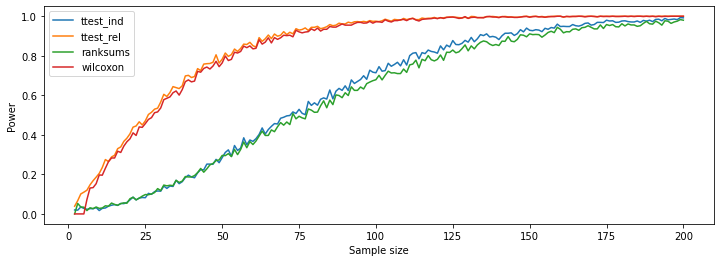

In [40]:
plt.figure( figsize = (12, 4) )

for i_test, k in enumerate( tests ):
    plt.plot( n_sample_test, powers[k], f'C{i_test}-', label = k )

plt.legend()
    
plt.xlabel( 'Sample size' )
plt.ylabel( 'Power' )